#Predicting Heart Disease

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*1*. Data Analysis

In [2]:
#Import the dataset
df = pd.read_csv('/content/dataset (2).csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#b.Get information about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


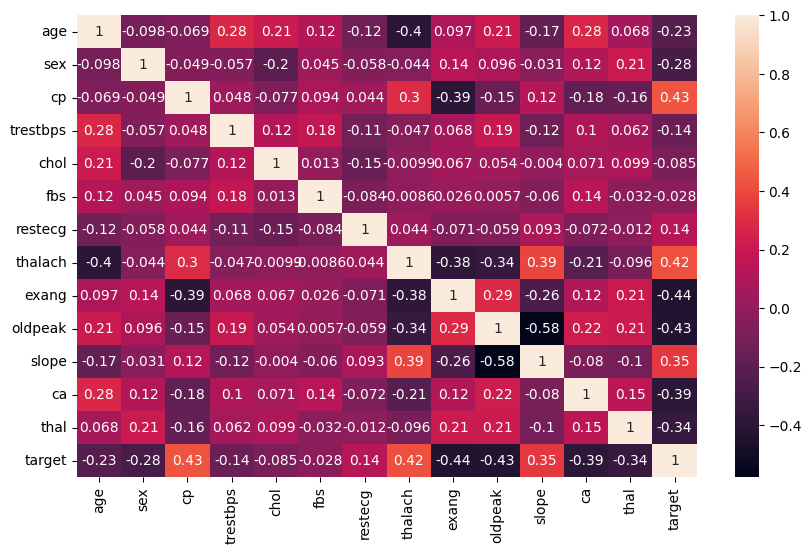

In [6]:
#c.Correlation between all fields
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)

*2*.Data Visualization:
a. Visualize the number of patients having a heart disease and not having
a heart disease
b. Visualize the age and whether a patient has disease or not
c. Visualize correlation between all features using a heat map

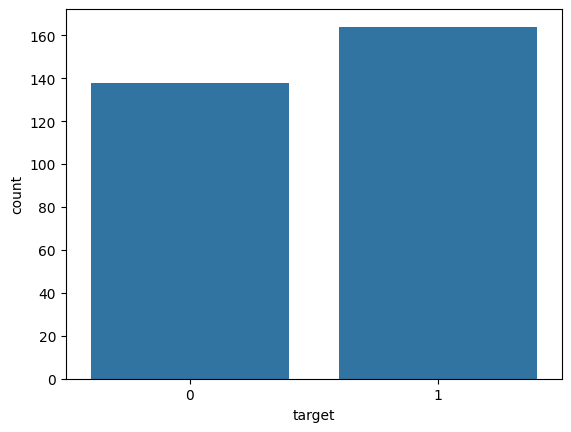

In [12]:
# a. Visualize the number of patients having a heart disease and not having a heart disease
sns.countplot(x='target', data=df)
plt.show()

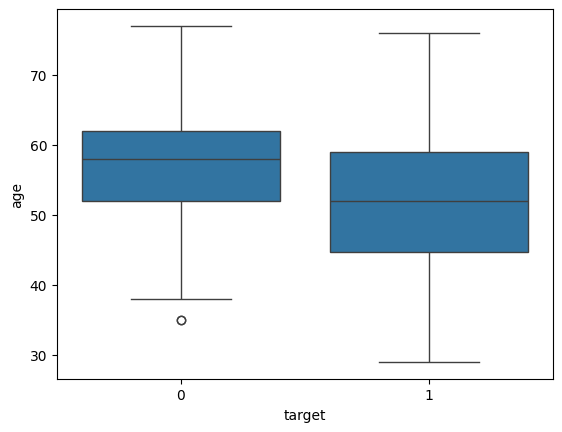

In [13]:
#b. Visualize the age and whether a patient has disease or not
sns.boxplot(x='target', y='age', data=df)
plt.show()

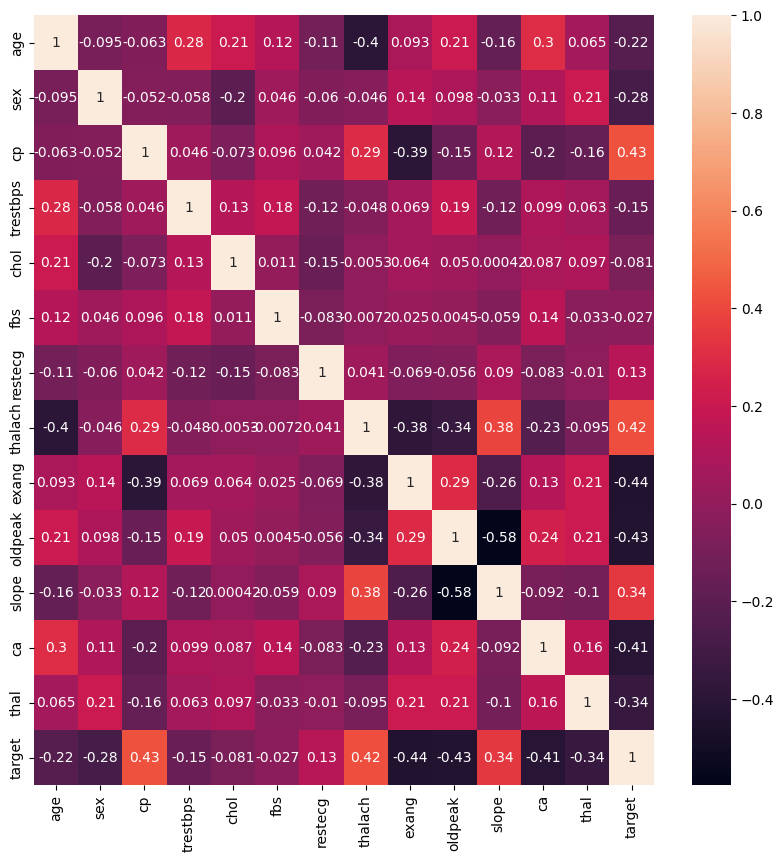

In [14]:
# c. Visualize correlation between all features using a heat map.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

*3*.Logistic Regression: a. Build a simple logistic regression model:   
     i. Divide the dataset in 70:30 ratio  
     ii. Build the model on train set and predict the values on test set       
     iii. Build the confusion matrix and get the accuracy score

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [20]:
conf_mat = confusion_matrix(y_test, y_pred_lr)
conf_mat

array([[34,  8],
       [ 8, 41]])

In [21]:
acc_scr_lr = accuracy_score(y_test, y_pred_lr)
acc_scr_lr

0.8241758241758241

*4*.Decision Tree:
   a. Build a decision tree model:
   
      i. Divide the dataset in 70:30 ratio
      ii. Build the model on train set and predict the values on test set
      iii. Build the confusion matrix and calculate the accuracy
      iv. Visualize the decision tree using the Graphviz package

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [23]:
dt = DecisionTreeClassifier()

In [24]:
X = df.drop('target', axis=1)
y = df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1])

In [29]:
conf_mat = confusion_matrix(y_test, y_pred_dt)
conf_mat

array([[35,  7],
       [ 9, 40]])

In [30]:
acc_scr_dt = accuracy_score(y_test, y_pred_dt)
acc_scr_dt

0.8241758241758241

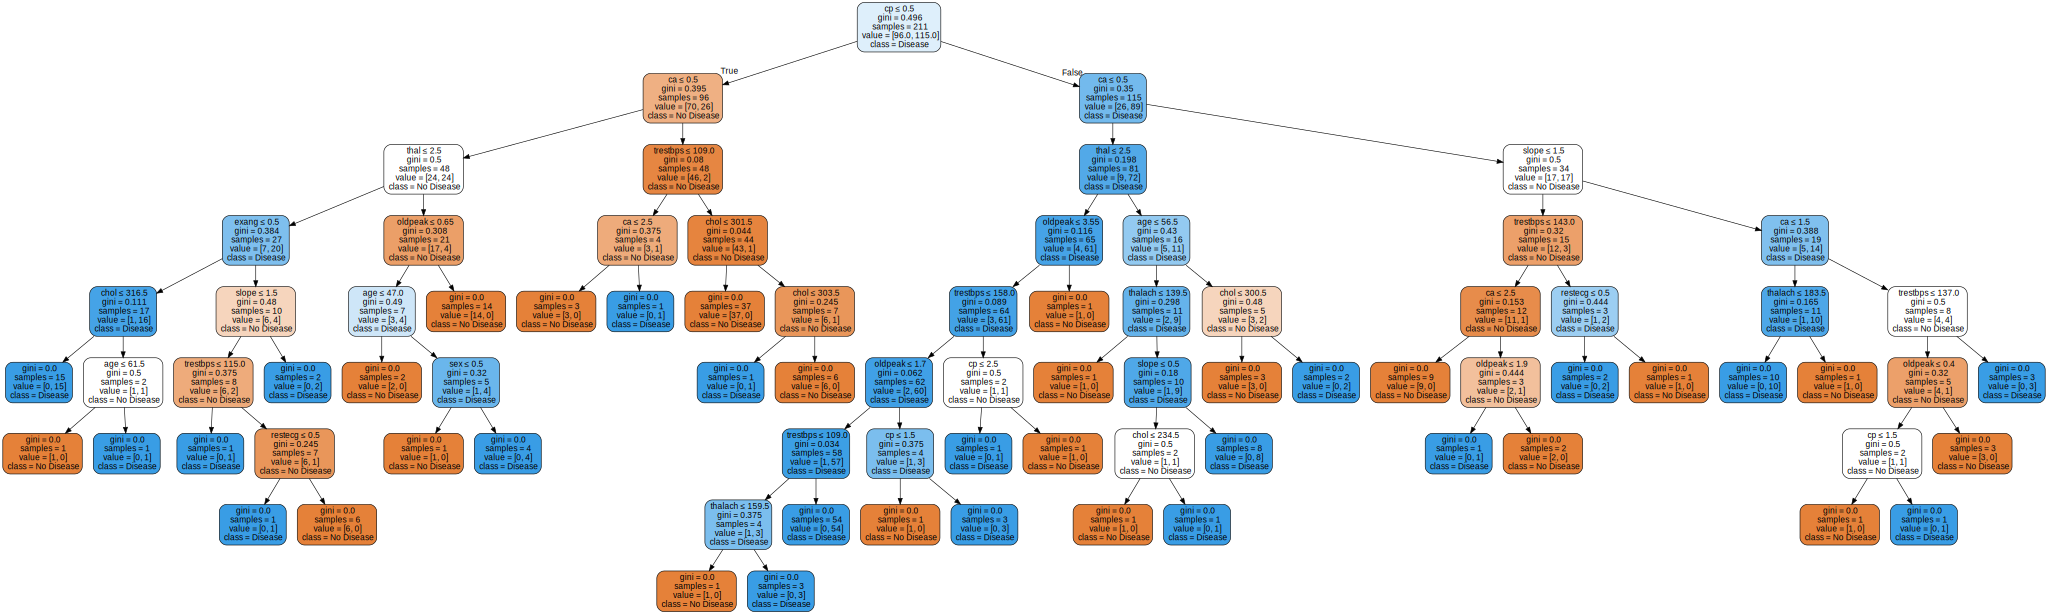

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns,
                                class_names=['No Disease', 'Disease'], filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

*5*.Random Forest:
   a. Build a Random Forest model:

      i. Divide the dataset in 70:30 ratio
      ii. Build the model on train set and predict the values on test set
      iii. Build the confusion matrix and calculate the accuracy
      iv. Visualize the model using the Graphviz package

In [32]:
from sklearn.ensemble import RandomForestClassifier


In [33]:
rfc = RandomForestClassifier()
X = df.drop('target', axis=1)
y = df['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [36]:
conf_mat = confusion_matrix(y_test, y_pred_rfc)
conf_mat

array([[36,  6],
       [ 8, 41]])

In [37]:
acc_scr_rfc = accuracy_score(y_test, y_pred_rfc)
acc_scr_rfc

0.8461538461538461

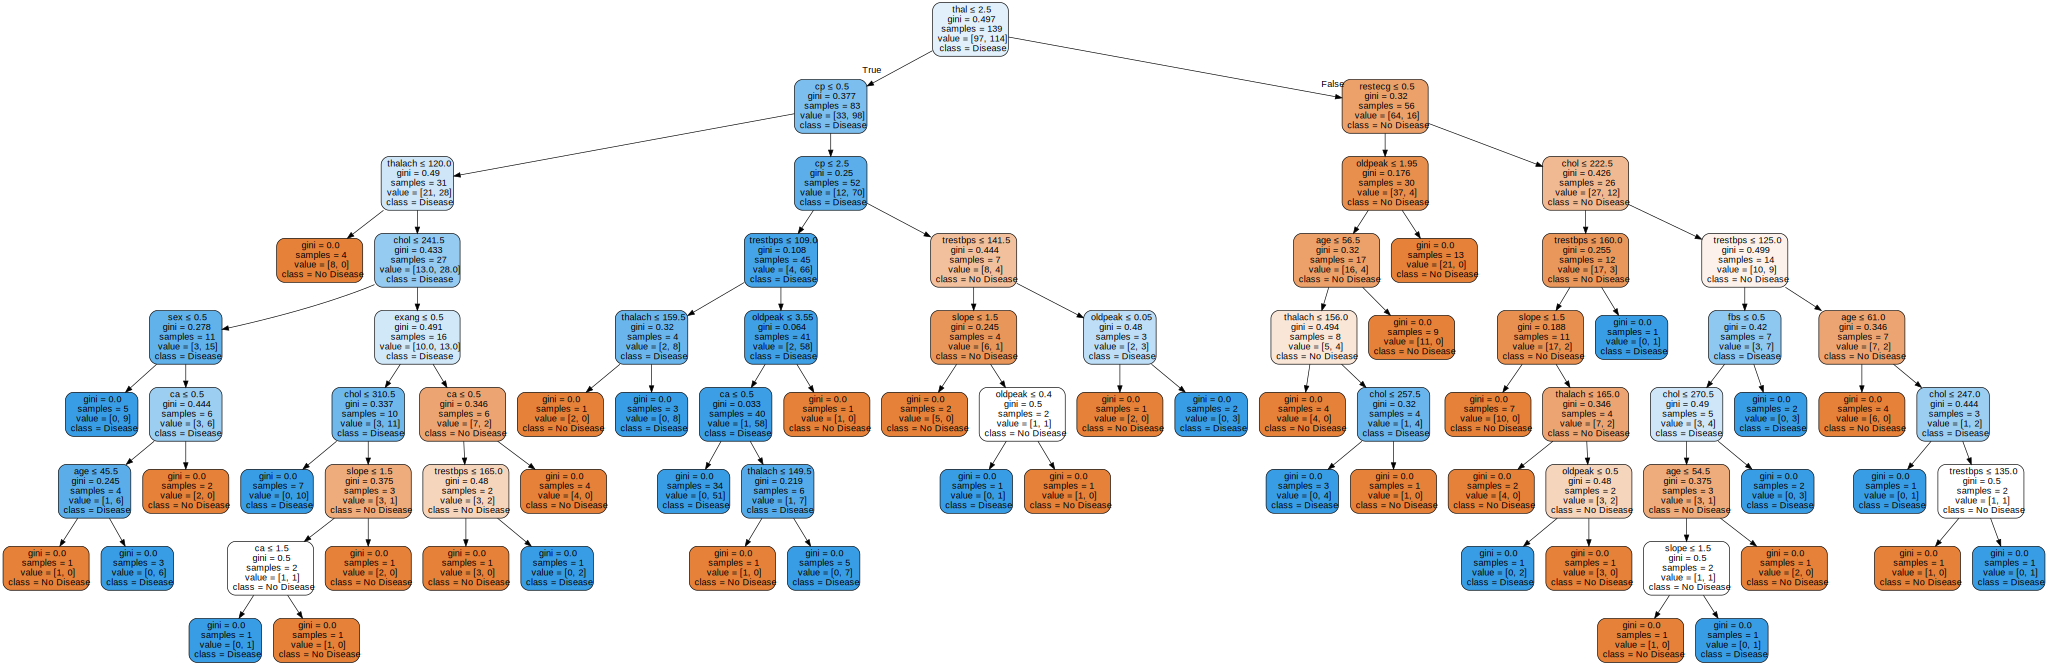

In [39]:
# iv. Visualize the model using the Graphviz package
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz
estimator = rfc.estimators_[0]
dot_data = tree.export_graphviz(estimator, out_file=None, feature_names=X.columns,
                                class_names=['No Disease', 'Disease'], filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # Saves as random_forest_tree.pdf
graph

*6*.Select the best model

    a. Print the confusion matrix of all classifiers
    b. Print the classification report of all classifiers
    c. Calculate Recall Precision and F1 score of all the models
    d. Visualize confusion matrix using heatmaps
    e. Select the best model based on the best accuracies

In [40]:
#a. Print the confusion matrix of all classifiers
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
conf_mat_rfc = confusion_matrix(y_test, y_pred_rfc)

In [44]:
#b. Print the classification report of all classifiers
#c. Calculate Recall Precision and F1 score of all the models
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



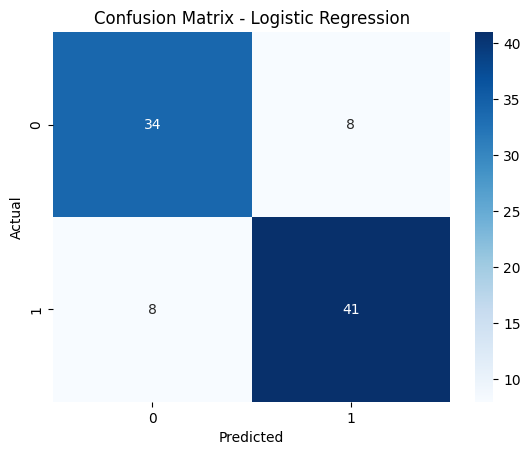

In [45]:
# d. Visualize confusion matrix using heatmaps
sns.heatmap(conf_mat_lr, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

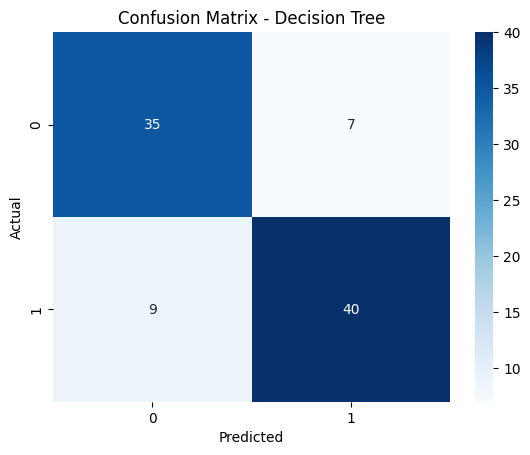

In [46]:
sns.heatmap(conf_mat_dt, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

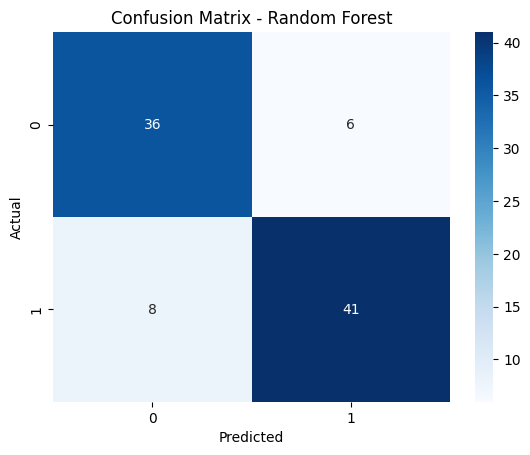

In [48]:
sns.heatmap(conf_mat_rfc, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [51]:
# Select the best model based on the best accuracies
acc_scr_lr = accuracy_score(y_test, y_pred_lr)
acc_scr_dt = accuracy_score(y_test, y_pred_dt)
acc_scr_rfc = accuracy_score(y_test, y_pred_rfc)

In [53]:
# e. Select the best model based on the best accuracies
print(f"Logistic Regression Accuracy: {acc_scr_lr}")
print(f"Decision Tree Accuracy: {acc_scr_dt}")
print(f"Random Forest Accuracy: {acc_scr_rfc}")

best_accuracy = max(acc_scr_lr, acc_scr_dt, acc_scr_rfc)

if best_accuracy == acc_scr_lr:
    print("Logistic Regression is the best model.")
elif best_accuracy == acc_scr_dt:
    print("Decision Tree is the best model.")
else:
    print("Random Forest is the best model.")

Logistic Regression Accuracy: 0.8241758241758241
Decision Tree Accuracy: 0.8241758241758241
Random Forest Accuracy: 0.8461538461538461
Random Forest is the best model.
